In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('activity_data.csv')
df = df.dropna(subset=['r_avg_IC50'])
df.sort_values(by=['r_avg_IC50'],ascending=True,inplace=True)
df = df.drop(df[df['r_avg_IC50']>=99].index)
print(df)
#df.to_csv('data.txt',sep ='\t', index = False, header = False)

                                                SMILES                  CID  \
479            N#Cc1cccc(CN2C(=O)C(=O)c3cccc(Br)c32)c1  LOR-NOR-30067bb9-11   
251  CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...   JOH-MSK-46727e7b-1   
624                 O=C(Oc1cncc(Cl)c1)c1cccc2[nH]ccc12   ALP-POS-c59291d4-5   
147            O=C(Nc1cncc2ccccc12)C1=CCCc2ccc(Cl)cc21   MAT-POS-0c8fa4a7-1   
253  O=S(=O)(Cc1ccccc1F)c1oc(-c2ccc(F)cc2)nc1S(=O)(...   LON-WEI-4d77710c-2   
..                                                 ...                  ...   
92             Nc1nn(C(=O)C2CCOc3ccc(Cl)cc32)c2ccncc12   ALP-POS-902f21bb-2   
818   COc1ccc(N2CCN(C(=O)c3cc(=O)[nH]c4ccccc34)CC2)cc1  BEN-DND-7e92b6ca-11   
420      CC(C)Cn1cc(NC(=O)NCCc2ccc(Cl)cc2)c2ccccc2c1=O   MAT-POS-2492181e-4   
194  Cc1cc(C(F)(F)F)nc2n[nH]c(NC(=O)C3CCOc4ccc(Cl)c...  JAG-UCB-52b62a6f-19   
422      CC(C)Cn1cc(NC(=O)NCCCN2CCC(C)CC2)c2ccccc2c1=O   MAT-POS-2492181e-6   

           canonical_CID  r_inhibition_at_20_uM  r_

In [2]:
dock = pd.read_csv('scores.csv')
dock = dock.dropna(axis=0, how='all')

dock.rename(columns={'lig_name': 'CID'},inplace = True)
dock['CID'] = dock['CID'].apply(lambda x: x.split('\t')[0])
#print(dock)

df = df[['CID','SMILES','r_avg_IC50']]
result=pd.merge(df,dock,on='CID')
print(result)

                     CID                                             SMILES  \
0    LOR-NOR-30067bb9-11            N#Cc1cccc(CN2C(=O)C(=O)c3cccc(Br)c32)c1   
1     JOH-MSK-46727e7b-1  CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...   
2     ALP-POS-c59291d4-5                 O=C(Oc1cncc(Cl)c1)c1cccc2[nH]ccc12   
3     MAT-POS-0c8fa4a7-1            O=C(Nc1cncc2ccccc12)C1=CCCc2ccc(Cl)cc21   
4     LON-WEI-4d77710c-2  O=S(=O)(Cc1ccccc1F)c1oc(-c2ccc(F)cc2)nc1S(=O)(...   
..                   ...                                                ...   
348   ALP-POS-902f21bb-2            Nc1nn(C(=O)C2CCOc3ccc(Cl)cc32)c2ccncc12   
349  BEN-DND-7e92b6ca-11   COc1ccc(N2CCN(C(=O)c3cc(=O)[nH]c4ccccc34)CC2)cc1   
350   MAT-POS-2492181e-4      CC(C)Cn1cc(NC(=O)NCCc2ccc(Cl)cc2)c2ccccc2c1=O   
351  JAG-UCB-52b62a6f-19  Cc1cc(C(F)(F)F)nc2n[nH]c(NC(=O)C3CCOc4ccc(Cl)c...   
352   MAT-POS-2492181e-6      CC(C)Cn1cc(NC(=O)NCCCN2CCC(C)CC2)c2ccccc2c1=O   

     r_avg_IC50  LF Rank Score  LF dG  LF VSscore  

In [3]:
#test1: exp_rank vs VSscore_rank
test1 = result
test1.sort_values(by=['r_avg_IC50'],ascending=True,inplace=True)
test1 = test1.reset_index(drop=True)
test1 = test1.reset_index(drop=False)
test1.rename(columns={'index':'exp_rank'}, inplace = True)
print(test1)

test1.sort_values(by=['LF Rank Score'],ascending=True,inplace=True)
test1 = test1.reset_index(drop=True)
test1 = test1.reset_index(drop=False)
test1.rename(columns={'index':'Rankscore_rank'}, inplace = True)

print(test1)
print(result)

     exp_rank                  CID  \
0           0  LOR-NOR-30067bb9-11   
1           1   JOH-MSK-46727e7b-1   
2           2   ALP-POS-c59291d4-5   
3           3   MAT-POS-0c8fa4a7-1   
4           4   LON-WEI-4d77710c-2   
..        ...                  ...   
348       348   ALP-POS-902f21bb-2   
349       349  BEN-DND-7e92b6ca-11   
350       350   MAT-POS-2492181e-4   
351       351  JAG-UCB-52b62a6f-19   
352       352   MAT-POS-2492181e-6   

                                                SMILES  r_avg_IC50  \
0              N#Cc1cccc(CN2C(=O)C(=O)c3cccc(Br)c32)c1    0.017013   
1    CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...    0.025860   
2                   O=C(Oc1cncc(Cl)c1)c1cccc2[nH]ccc12    0.055726   
3              O=C(Nc1cncc2ccccc12)C1=CCCc2ccc(Cl)cc21    0.081067   
4    O=S(=O)(Cc1ccccc1F)c1oc(-c2ccc(F)cc2)nc1S(=O)(...    0.099212   
..                                                 ...         ...   
348            Nc1nn(C(=O)C2CCOc3ccc(Cl)cc32)c2ccncc1

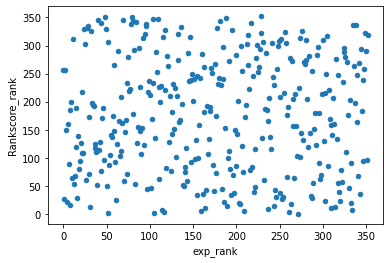

0.020851702553940036


In [4]:
test1.plot(kind='scatter', x='exp_rank', y='Rankscore_rank')
plt.show()

corr = test1.exp_rank.corr(test1.Rankscore_rank)
print(corr)

In [5]:
# kt = 9.83*10^(-22) cal at 20 degree
dG_exp = 9.83*10**(-22)*np.log(test1.r_avg_IC50/result['r_avg_IC50'].max())*(6.02*10**23)
print(dG_exp)

dG_flare = test1['LF dG']-(result['LF dG'].max())
print(dG_flare)

#test2: dG_exp vs dG_flare
test2 = pd.concat([dG_exp, dG_flare], axis=1)
test2.rename(columns={'r_avg_IC50':'dG_exp', 'LF dG': 'dG_flare'},inplace=True)
print(test2)

0      -548.919525
1     -2961.019003
2     -2272.051066
3      -663.230075
4     -2098.682203
          ...     
348   -2282.042267
349   -1170.889028
350   -2975.512628
351   -2587.112156
352    -957.703324
Name: r_avg_IC50, Length: 353, dtype: float64
0     -5.082
1     -2.599
2     -5.234
3     -5.095
4     -5.197
       ...  
348   -3.306
349   -2.483
350   -3.092
351   -0.802
352   -2.232
Name: LF dG, Length: 353, dtype: float64
          dG_exp  dG_flare
0    -548.919525    -5.082
1   -2961.019003    -2.599
2   -2272.051066    -5.234
3    -663.230075    -5.095
4   -2098.682203    -5.197
..           ...       ...
348 -2282.042267    -3.306
349 -1170.889028    -2.483
350 -2975.512628    -3.092
351 -2587.112156    -0.802
352  -957.703324    -2.232

[353 rows x 2 columns]


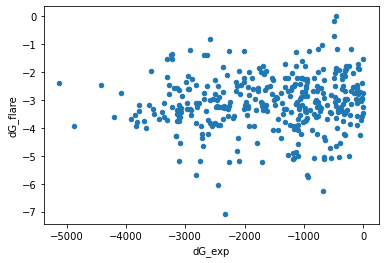

0.08776788005965991


In [6]:
test2.plot(kind='scatter', x='dG_exp', y='dG_flare')
plt.show()

corr1 = test2.dG_exp.corr(test2.dG_flare)
print(corr1)

# GNN

In [7]:
#set train,test data set.
prot_seq ='SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVTF'
df1 = result
df1['target_sequence']= prot_seq
df1=df1.rename(columns={'r_avg_IC50':'affinity'})
df1['affinity'] = -np.log10(df1['affinity']/(1e6))
print(df1)
#df1.to_csv('candidates.csv')

from sklearn.model_selection import train_test_split
train, test = train_test_split(df1,test_size=0.2)
#print(test)
# train.to_csv('covid_train.csv')
# test.to_csv('covid_test.csv')

                     CID                                             SMILES  \
0    LOR-NOR-30067bb9-11            N#Cc1cccc(CN2C(=O)C(=O)c3cccc(Br)c32)c1   
1     JOH-MSK-46727e7b-1  CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...   
2     ALP-POS-c59291d4-5                 O=C(Oc1cncc(Cl)c1)c1cccc2[nH]ccc12   
3     MAT-POS-0c8fa4a7-1            O=C(Nc1cncc2ccccc12)C1=CCCc2ccc(Cl)cc21   
4     LON-WEI-4d77710c-2  O=S(=O)(Cc1ccccc1F)c1oc(-c2ccc(F)cc2)nc1S(=O)(...   
..                   ...                                                ...   
348   ALP-POS-902f21bb-2            Nc1nn(C(=O)C2CCOc3ccc(Cl)cc32)c2ccncc12   
349  BEN-DND-7e92b6ca-11   COc1ccc(N2CCN(C(=O)c3cc(=O)[nH]c4ccccc34)CC2)cc1   
350   MAT-POS-2492181e-4      CC(C)Cn1cc(NC(=O)NCCc2ccc(Cl)cc2)c2ccccc2c1=O   
351  JAG-UCB-52b62a6f-19  Cc1cc(C(F)(F)F)nc2n[nH]c(NC(=O)C3CCOc4ccc(Cl)c...   
352   MAT-POS-2492181e-6      CC(C)Cn1cc(NC(=O)NCCCN2CCC(C)CC2)c2ccccc2c1=O   

     affinity  LF Rank Score  LF dG  LF VSscore  \


In [8]:
df2 = pd.read_csv('Newactivity_data.csv')
df2['target_sequence']= prot_seq
df2.rename(columns={'f_avg_pIC50':'affinity'},inplace = True)
df2 = df2.dropna(subset=['affinity'])

train1, test1 = train_test_split(df2,test_size=0.2)
#print(test1)
#train1.to_csv('covid1_train.csv')
#test1.to_csv('covid1_test.csv')

In [9]:
copy = df1['SMILES']
print(list)
copy.to_csv('candidates.txt',index=None)

<class 'list'>
